In [208]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Классификация при помощи ДПР

# Описание набора данных

В этой лабораторной работе мы рассмотрим разные подходы к задаче классификации, в частности, деревья принятия решений, а также поговорим о том, как бороться с несбалансированностью датасета.

Изучаемый нами набор данных — это набор данных о принятых предложениях по кредитам в банке **Thera-Bank**. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более 9,6%. Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

Набор данных содержит как информацию о клиенте, так и информацию о его реакции на кампанию предыдущего года:

*   **ID**: ID клиента

*   **Age**: Возраст (полных лет)

*   **Experience**: Стаж

*   **Income**: Годовой доход (в тысячах)

*   **ZIP Code**: Индекс места проживания

*   **Family**: Количество членов семьи

*   **CCAvg**: Средние траты в месяц по кредитной карте (в тысячах)

*   **Education**: Уровень образования (1: бакалавр, 2: магистр, 3: что-то большее)

*   **Mortgage**: Стоимость ипотеки, если имеется (в тысячах)

*   **Securities Account**: Наличие счета в ценных бумагах

*   **CD Account**: Наличие сертификата на депозит

*   **Online**: Использует ли клиент интернет-банкинг

*   **CreditCard**: Использует ли клиент кредитную карту, выпущенную данным банком

*   **Personal Loan**: Принял ли клиент персональное предложение по кредиту (целевая переменная)

# Разведочный анализ данных

Считайте набор данных в датафрейм

In [209]:
df = pd.read_csv('/Users/muzafarov/Desktop/MyEducation/ML_OE/Bank_Personal_Loan_Modelling_train.csv')

При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [210]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Набор данных содержит 14 переменных, 1 из которых является целевой.

1 номинальная переменная: **ID**

5 числовых переменных: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 категориальные переменных: **Family**, **Education**, **ZIP Code**

5 булевых переменных: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

Пропущенных значений нет.

Experience содержит какие-то отрицательные значения

In [211]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.80,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.50,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.10,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.10,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.50,1,0,0,0,0,0,0
5,1128,35,9,58,91101,1,2.50,1,0,0,0,0,1,1
6,3077,29,-1,62,92672,2,1.75,3,0,0,0,0,0,1
7,4617,66,41,114,92521,1,0.80,3,0,0,0,0,1,1
8,4989,34,8,85,95134,1,2.50,1,136,0,0,0,0,1
9,3578,39,9,32,91016,3,2.00,3,0,0,0,0,1,0


Удалите колонку ID, она нам не понадобится

In [212]:
df = df.drop(columns='ID')

Имеет смысл попробовать отловить каике-либо зависимости или их отсутствие.

Постройте матрицу корреляций

<AxesSubplot:>

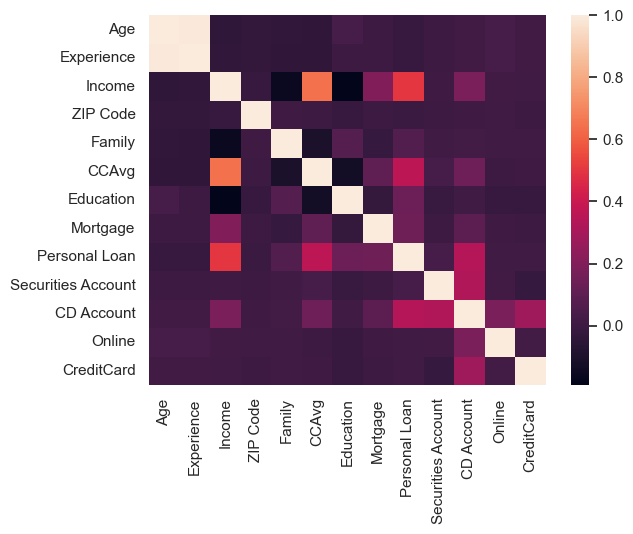

In [213]:
sns.heatmap(df.corr()) 

In [214]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

Определите две наиболее коррелированных переменных

In [215]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df.corr(), 3))

Top Absolute Correlations
Age     Experience       0.999699
Income  CCAvg            0.896609
        Personal Loan    0.709616
dtype: float64


Определите признак, который меньше всего коррелирует (можно считать почти не коррелирует) с остальными признаками (в том числе с откликом). Удалите этот признак из рассмотрения.

Введите название удаленного признака.

In [216]:
df = df.drop(columns='ZIP Code')

# Предварительная подготовка данных

## Модификация признаков

Стоит разобраться с полем <code>Experience</code>. Видно, что опыт коррелирует с возрастом. Однако, в поле <code>Experience</code> присутствуют отрицательные значения. Имеет смысл "сдвинуть" значения в этой колонке. Добавьте ко всем значениям колонки <code>Experience</code> одно число так, чтобы минимальное значение было равно $0$.

Вычислите выборочное среднее колонки <code>Experience</code> после преобразования.

In [217]:
df['Experience'].sort_values()

1946    -3
3722    -3
3142    -3
1856    -3
3871    -2
        ..
3167    42
646     42
3250    43
3700    43
1197    43
Name: Experience, Length: 4000, dtype: int64

In [218]:
df['Experience'] = df['Experience'] + 3

In [219]:
df['Experience'].mean()

23.19625

Аналогично имеет смысл модфицировать поле <code>CCAvg</code>. Раз рассматривается годовой доход, то имеет смысл и значения трат рассматривать в рамках года.

Вычислите выборочное среднее колонки <code>CCAvg</code> после преобразования.

In [220]:
df['CCAvg'] = df['CCAvg']*12

In [221]:
df['CCAvg'].mean()

23.061659999999982

## Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать <code>sns.boxplot()</code>. Определите признак по изображению boxplot из вашего варианта.

In [222]:
df.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
5,35,12,58,1,30.0,1,0,0,0,0,1,1
6,29,2,62,2,21.0,3,0,0,0,0,0,1
7,66,44,114,1,9.6,3,0,0,0,0,1,1
8,34,11,85,1,30.0,1,136,0,0,0,0,1
9,39,12,32,3,24.0,3,0,0,0,0,1,0


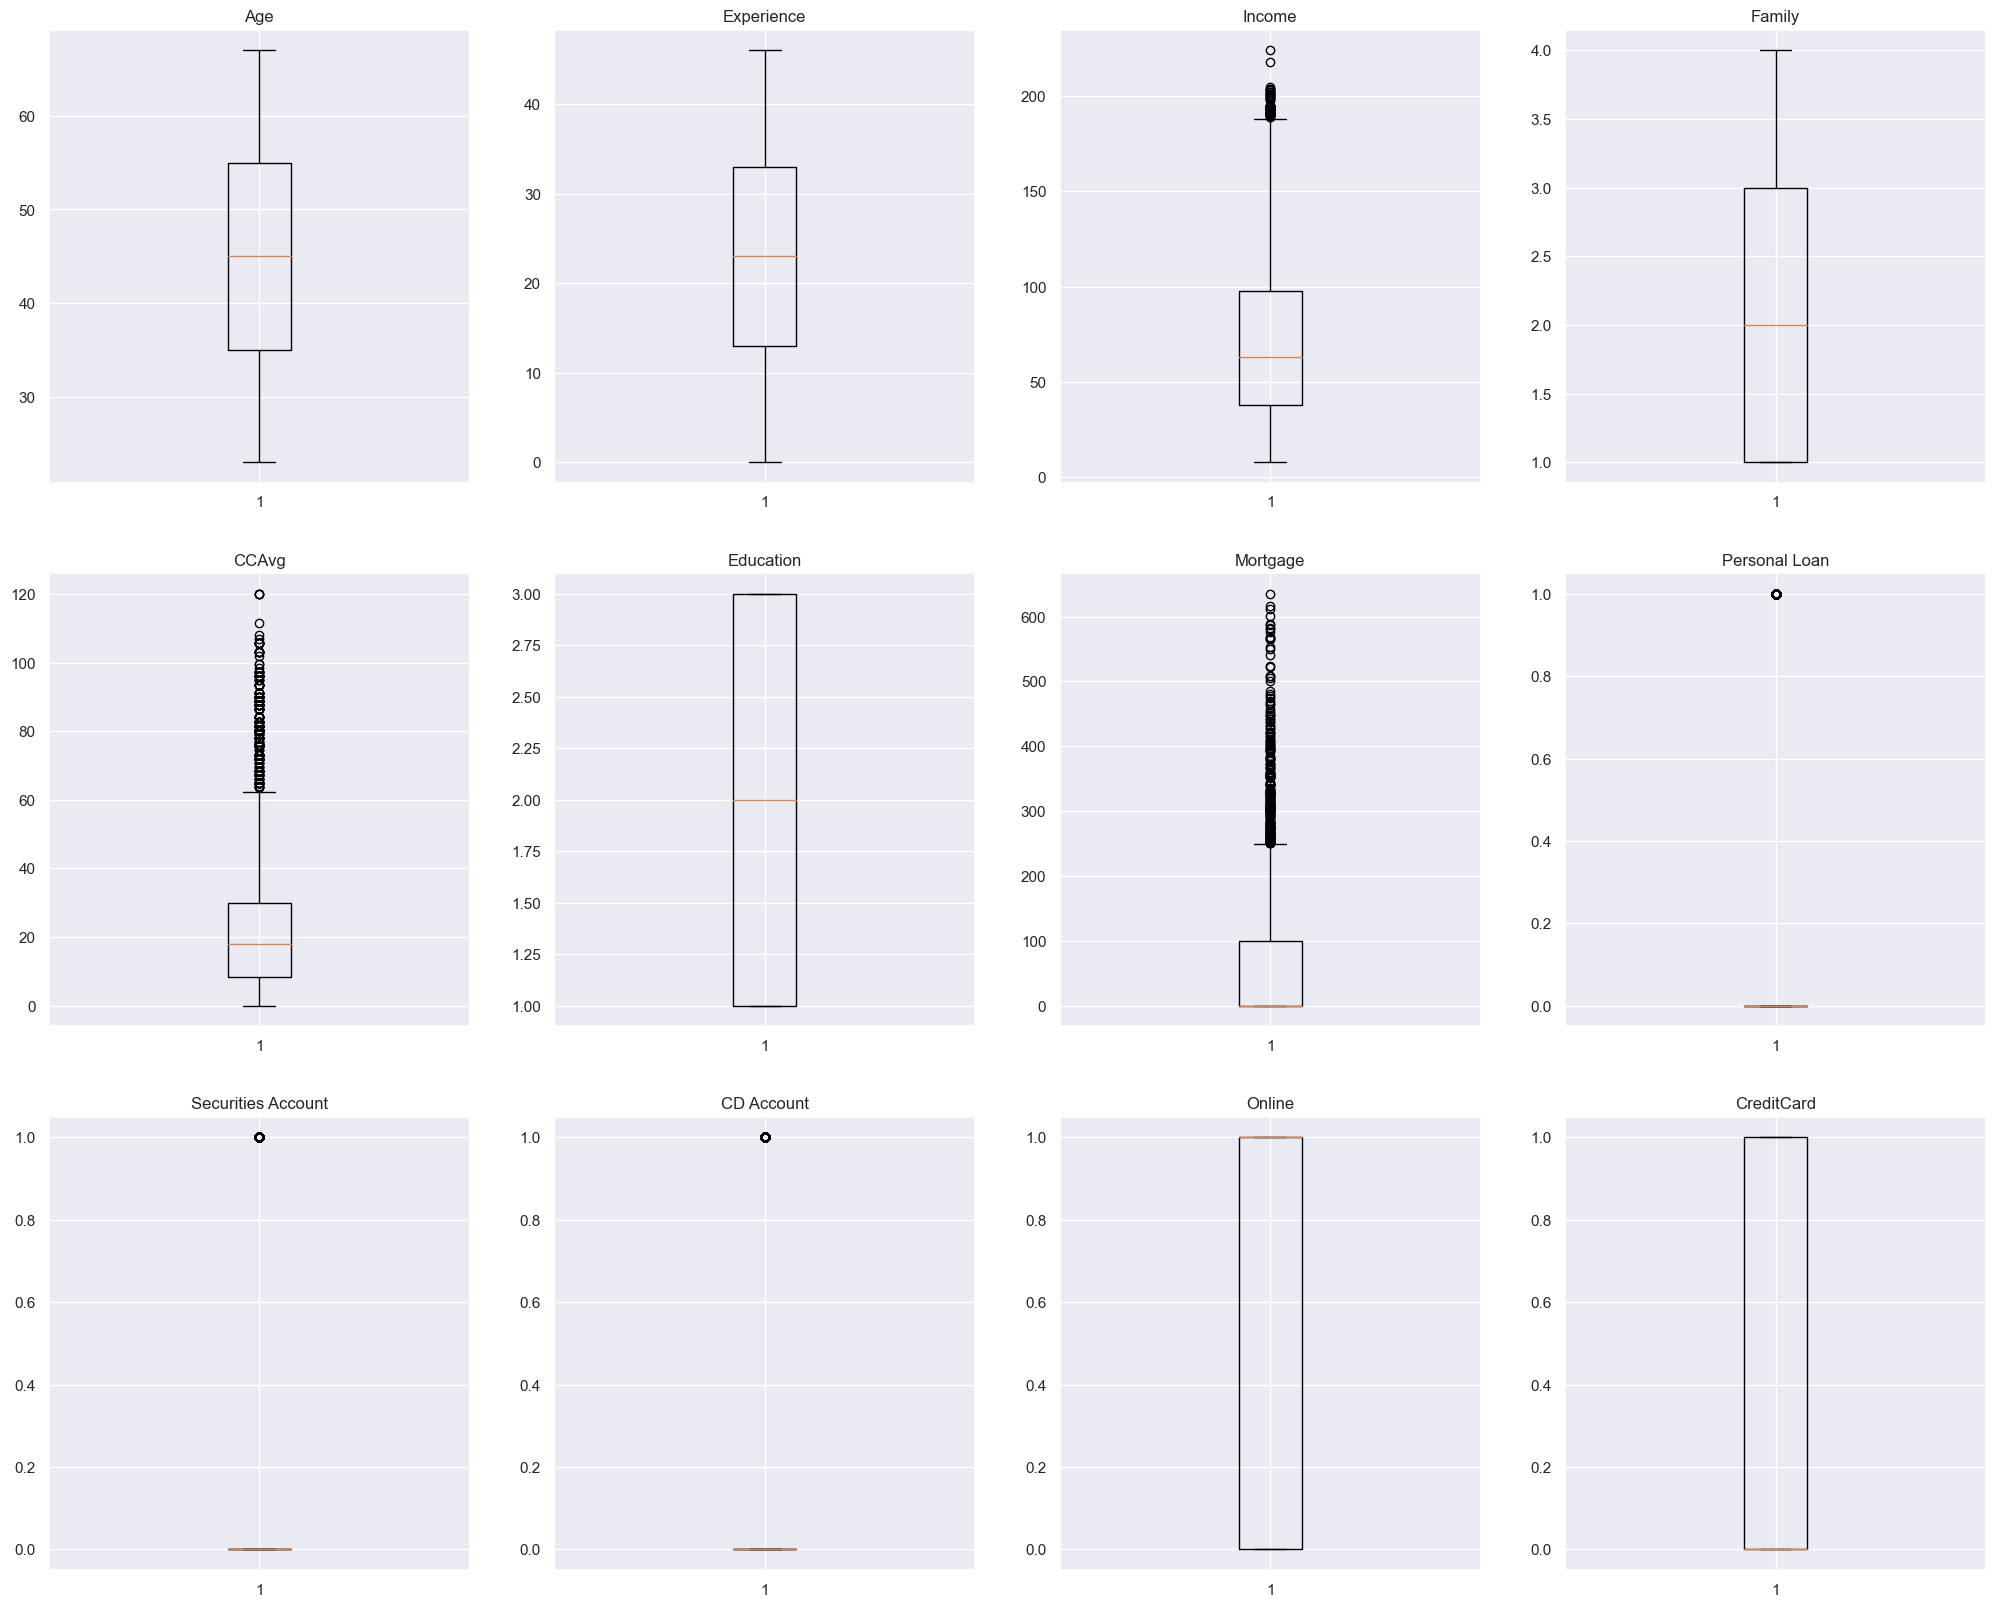

In [223]:
for ax, num_col_name in zip(plt.subplots(3, 4, figsize=(25, 20))[1].flatten(), df.columns):
  ax.set_title(num_col_name)
  ax.boxplot(df[num_col_name])


Определите признак, содержащий наибольшее число выбросов. Введите название этого признака.


In [224]:
# < ENTER YOUR CODE HERE > 

Имеет смысл поработать с этим признаком, а для этого стоит руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом 3-$\sigma$ для нормального распределения, можно выбросить слишком далекие от нуля хвосты. Постройте гистограмму распределения значений в рамках этого признака.

In [225]:
df_1 = (df['Mortgage'] - df['Mortgage'].mean())/np.std(df['Mortgage'])

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>. 

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$. 

In [226]:
from scipy.stats import zscore

In [227]:
z_score = zscore(df_1, axis=0, ddof=0, nan_policy='propagate')
len(z_score[z_score>3])


83

In [228]:
arr_idxs = np.where(abs(z_score) > 3)[0]
df = df.drop(labels=arr_idxs, axis=0)

Итак, выбросов не очень множко, поэтому выбросите их из набора данных. Введите оставшееся в датасете число строк.

In [229]:
len(df)

3917

In [230]:
df.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
5,35,12,58,1,30.0,1,0,0,0,0,1,1
6,29,2,62,2,21.0,3,0,0,0,0,0,1
7,66,44,114,1,9.6,3,0,0,0,0,1,1
8,34,11,85,1,30.0,1,136,0,0,0,0,1
9,39,12,32,3,24.0,3,0,0,0,0,1,0


# Построение моделей

# Базовый алгоритм

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [238]:
X = df.drop(columns='Personal Loan')
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
DTC = DecisionTreeClassifier(random_state=7, criterion='entropy', class_weight='balanced')
DTC.fit(X_train,y_train)
pred = DTC.predict(X_test)
f1_score(y_test,pred)

0.8652482269503546

## Учет дисбаланса соотношения классов

А теперь, если вспомнить, что выборка несбалансирована, то можно указать дополнительный параметр <code>class_weight</code>. Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [245]:
y_train.value_counts(1)

0    0.911267
1    0.088733
Name: Personal Loan, dtype: float64

## Upsampling обучающей выборки

Помимо очевидного присвоения весов несбалансированным классам, можно воспользоваться алгоритмом <code>SMOTE</code>. Ему на вход подаются экземпляры всех классов с их метками, а он в свою очередь пытается на их основе экстраполировать само распределение данных этого класса. После этого он сэмплирует новые объекты классов так, пока количество строк каждого класса не станет везде одинаковым.

Получается, что в таком случае будет получена сбалансированная выборка, и пропадет нужда как-то ухищряться с весами и прочим. 

Определите долю элементов класса $0$ тренировочного набора данных.

In [254]:
from imblearn.over_sampling import SMOTE

In [255]:
SMOTE = SMOTE(random_state=7)
X_train_res, y_train_res = SMOTE.fit_resample(X_train, y_train)

In [256]:
y_train_res.value_counts()

0    2855
1    2855
Name: Personal Loan, dtype: int64

Используя класс <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> из модуля <code>imblearn.over_sampling</code> сбалансируйте обучающую выборку с параметрами, указанными в вашем варианте.

In [235]:
# < ENTER YOUR CODE HERE > 

Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов. Введите количество объектов класса $1$.

Снова обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [258]:
DTC = DecisionTreeClassifier(random_state=7, criterion='entropy')
DTC.fit(X_train_res,y_train_res)
pred = DTC.predict(X_test)
f1_score(y_test,pred)

0.8205128205128205